In [16]:
import matplotlib.pyplot as plt
import math

In [51]:
def go_to_improve2(x_current, y_current, x_final, y_final, squared_error, step_size):
    x_coords = [x_current]
    y_coords = [y_current]
    
    dx = x_final - x_current
    dy = y_final - y_current
    total_distance = (dx**2 + dy**2)**0.5

    while dx**2 + dy**2 > squared_error:
        # Calculate step increments proportional to the slope
        step_dx = step_size * (dx / total_distance)
        step_dy = step_size * (dy / total_distance)

        # Round steps to the nearest step_size for stepper motor precision
        step_dx = round(step_dx / step_size) * step_size
        step_dy = round(step_dy / step_size) * step_size

        # Update the current position
        x_current += step_dx
        y_current += step_dy

        # Append new coordinates
        x_coords.append(x_current)
        y_coords.append(y_current)

        # Update remaining distance
        dx = x_final - x_current
        dy = y_final - y_current
        total_distance = (dx**2 + dy**2)**0.5

    return [x_coords, y_coords]


In [46]:
def go_to_improve(x_current,y_current,x_final,y_final,squared_error,step_size):
    x_coords = [x_current]
    y_coords = [y_current]
    dx = x_final - x_current
    dy = y_final - y_current
    while(dx**2+dy**2 > squared_error):
        dx = x_final - x_current
        dy = y_final - y_current
        diff_x = step_size
        diff_y = step_size
        if dx < 0:
           diff_x = -diff_x
           dx=-dx 
        if dy < 0:
            diff_x=-diff_y
            dy=-dy
        if dx == 0:
            for i in range(round(dy)):
                x_current+=diff_y
        
        slope = dy/dx

        if slope >= 1:
            slope = round(dy/step_size)*step_size/dx
            for i in range(round(slope)):
                y_current+=diff_y
            x_current+=diff_x
        
        elif slope < 1:
            slope = round(dx/step_size)*step_size/dy
            for i in range(round(slope)):
                x_current+=diff_x
            y_current+=diff_y
        x_coords.append(x_current)
        y_coords.append(y_current)
    return [x_coords,y_coords]

In [39]:
def go_to(x_current,y_current,x_final,y_final,squared_error,step_size):
    x_coords = [x_current]
    y_coords = [y_current]
    dx = x_final - x_current
    dy = y_final - y_current
    while(dx**2+dy**2 > squared_error):
        dx = x_final - x_current
        dy = y_final - y_current
        diff_x = step_size
        diff_y = step_size
        if dx < 0:
           diff_x = -diff_x
           dx=-dx 
        if dy < 0:
            diff_x=-diff_y
            dy=-dy
        if dx == 0:
            for i in range(round(dy)):
                x_current+=diff_y
        
        slope = dy/dx

        if slope >= 1:
            for i in range(round(slope)):
                y_current+=diff_y
            x_current+=diff_x
        
        elif slope < 1:
            slope = 1/slope
            for i in range(round(slope)):
                x_current+=diff_x
            y_current+=diff_y
        x_coords.append(x_current)
        y_coords.append(y_current)
    return [x_coords,y_coords]

In [18]:
print(*go_to(10,10,105,105,0.2**2,0.2))

[10, 10.2, 10.399999999999999, 10.599999999999998, 10.799999999999997, 10.999999999999996, 11.199999999999996, 11.399999999999995, 11.599999999999994, 11.799999999999994, 11.999999999999993, 12.199999999999992, 12.399999999999991, 12.59999999999999, 12.79999999999999, 12.99999999999999, 13.199999999999989, 13.399999999999988, 13.599999999999987, 13.799999999999986, 13.999999999999986, 14.199999999999985, 14.399999999999984, 14.599999999999984, 14.799999999999983, 14.999999999999982, 15.199999999999982, 15.39999999999998, 15.59999999999998, 15.79999999999998, 15.999999999999979, 16.199999999999978, 16.399999999999977, 16.599999999999977, 16.799999999999976, 16.999999999999975, 17.199999999999974, 17.399999999999974, 17.599999999999973, 17.799999999999972, 17.99999999999997, 18.19999999999997, 18.39999999999997, 18.59999999999997, 18.79999999999997, 18.999999999999968, 19.199999999999967, 19.399999999999967, 19.599999999999966, 19.799999999999965, 19.999999999999964, 20.199999999999964, 

<Figure size 2000x2000 with 0 Axes>

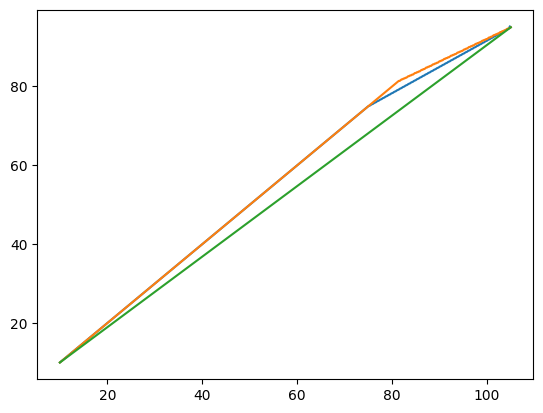

<Figure size 2000x2000 with 0 Axes>

In [53]:
x1,x2=10,105
y1,y2=10,95
plt.plot(*go_to(x1,y1,x2,y2,0.2**2,0.2))
plt.plot(*go_to_improve2(x1,y1,x2,y2,0.2**2,0.2))
plt.plot([x1,x2],[y1,y2])
plt.figure(figsize=(20,20))